# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Charles Wijaya
- **Email:** c14220046@john.petra.ac.id
- **ID Dicoding:** charles_wijaya_bt9v

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
  Bagaimana segmentasi pelanggan berdasarkan jumlah dan frekuensi pembelian?
  
- Pertanyaan 2:
  Produk atau kategori apa yang paling sering dibeli oleh pelanggan tertentu?

- Pertanyaan 3:
  Siapa penjual dengan performa terbaik berdasarkan jumlah pesanan dan rating pelanggan?
  
- Pertanyaan 4:
  Apakah ada hubungan antara waktu pengiriman dan kepuasan pelanggan (berdasarkan rating)?

## Import Semua Packages/Library yang Digunakan

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [30]:
#Baca semua csv yang ada
customer_df = pd.read_csv('./data/customers_dataset.csv')
products_df = pd.read_csv('./data/products_dataset.csv')
sellers_df = pd.read_csv('./data/sellers_dataset.csv')
orders_df = pd.read_csv('./data/orders_dataset.csv')
geolocation_df = pd.read_csv('./data/geolocation_dataset.csv')
order_items_df = pd.read_csv('./data/order_items_dataset.csv')
order_payments_df = pd.read_csv('./data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('./data/order_reviews_dataset.csv')
product_category_df = pd.read_csv('./data/product_category_name_translation.csv')

In [31]:
customer_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [32]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [33]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [34]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [35]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [36]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [37]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [38]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [39]:
product_category_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Insight:**
- Dataset ini kemungkinan berasal dari platform e-commerce yang disimpan dalam format CSV.
- Tujuan utama dari analisis data ini adalah untuk meningkatkan performa platform dengan menggali berbagai informasi penting. Beberapa tujuan utama analisis ini meliputi:
    1. Mengelompokkan pelanggan berdasarkan jumlah dan frekuensi pembelian untuk menentukan target pelanggan utama.
    2. Menganalisis preferensi pelanggan terhadap produk atau kategori tertentu guna meningkatkan rekomendasi dan strategi pemasaran.
    3. Menilai performa penjual berdasarkan jumlah pesanan dan rating pelanggan untuk mengidentifikasi mitra terbaik.

### Assessing Data

In [40]:
customer_df.info()
products_df.info()
sellers_df.info()
orders_df.info()
geolocation_df.info()
order_items_df.info()
order_payments_df.info()
order_reviews_df.info()
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_p

In [41]:
print('Customers Dataset')
print(customer_df.isnull().sum())
print()
print('Products Dataset')
print(products_df.isnull().sum())
print()
print('Sellers Dataset')
print(sellers_df.isnull().sum())
print()
print('Orders Dataset')
print(orders_df.isnull().sum())
print()
print('Geolocation Dataset')
print(geolocation_df.isnull().sum())
print()
print('Order items Dataset')
print(order_items_df.isnull().sum())
print()
print('Order Payments Dataset')
print(order_payments_df.isnull().sum())
print()
print('Order Reviews Dataset')
print(order_reviews_df.isnull().sum())
print()
print('Product Category Dataset')
print(product_category_df.isnull().sum())

Customers Dataset
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Products Dataset
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Sellers Dataset
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Orders Dataset
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Geoloc

In [42]:
print('Customers Dataset')
print(customer_df.duplicated().sum())
print()
print('Products Dataset')
print(products_df.duplicated().sum())
print()
print('Sellers Dataset')
print(sellers_df.duplicated().sum())
print()
print('Orders Dataset')
print(orders_df.duplicated().sum())
print()
print('Geolocation Dataset')
print(geolocation_df.duplicated().sum())
print()
print('Order items Dataset')
print(order_items_df.duplicated().sum())
print()
print('Order Payments Dataset')
print(order_payments_df.duplicated().sum())
print()
print('Order Reviews Dataset')
print(order_reviews_df.duplicated().sum())
print()
print('Product Category Dataset')
print(product_category_df.duplicated().sum())

Customers Dataset
0

Products Dataset
0

Sellers Dataset
0

Orders Dataset
0

Geolocation Dataset
261831

Order items Dataset
0

Order Payments Dataset
0

Order Reviews Dataset
0

Product Category Dataset
0


In [43]:
print('Customers Dataset')
print(customer_df.describe())
print()
print('Products Dataset')
print(products_df.describe())
print()
print('Sellers Dataset')
print(sellers_df.describe())
print()
print('Orders Dataset')
print(orders_df.describe())
print()
print('Geolocation Dataset')
print(geolocation_df.describe())
print()
print('Order items Dataset')
print(order_items_df.describe())
print()
print('Order Payments Dataset')
print(order_payments_df.describe())
print()
print('Order Reviews Dataset')
print(order_reviews_df.describe())
print()
print('Product Category Dataset')
print(product_category_df.describe())

Customers Dataset
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Products Dataset
       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.0000

**Insight:**
- Ada beberapa data kosong tapi seharusnya kolom yang datanya kosong tidak akan digunakan oleh kita
- Ada beberapa products yang tidak memiliki kategori
- 1 Order bisa memiliki lebih dari satu order items
- 1 Order bisa memiliki lebih dari satu order payment dimana bisa dicicil
- Ada beberapa keanehan yang ditemukan:
    1. Ada berat dari sebuah product yang 1 gram saja
    2. Ada payment value yang 0 sehingga ada kesalahan

### Cleaning Data

In [44]:
# Hapus produk dengan berat 0 gram karena mungkin itu data yang tidak valid
products_df = products_df[products_df['product_weight_g'] > 0]

#  Hapus order yang tidak memiliki tanggal pengiriman (kemungkinan dibatalkan)
orders_df = orders_df.dropna(subset=['order_delivered_customer_date'])

# Hapus order dengan pembayaran 0 karena mungkin saja itu data yang tidak valid atau order yang dicancel
order_payments_df = order_payments_df[order_payments_df['payment_value'] > 0]

# Konversi kolom tanggal ke datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Hapus duplikat jika ada
customer_df = customer_df.drop_duplicates()
products_df = products_df.drop_duplicates()
sellers_df = sellers_df.drop_duplicates()
orders_df = orders_df.drop_duplicates()
geolocation_df = geolocation_df.drop_duplicates()
order_items_df = order_items_df.drop_duplicates()
order_payments_df = order_payments_df.drop_duplicates()
order_reviews_df = order_reviews_df.drop_duplicates()
product_category_df = product_category_df.drop_duplicates()

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\2686700265.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\2686700265.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\2686700265.py:13: SettingWithCopyWarning: 
A value is 

**Insight:**
- Ada beberapa order yang tidak memiliki tanggal pengiriman, yang kemungkinan besar merupakan order yang dibatalkan atau tidak dikirim sehingga order tersebut dihapus.
- Dimana payment yang memiliki value 0 dihapus karena mungkin order dibatalkan.
- Dimana product yang memiliki berat 0 dihapus karena mungkin ada salah input.

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [45]:
# Merge Customers dengan Orders
merged_df = orders_df.merge(customer_df, on="customer_id", how="left")

# Merge Orders dengan Order Items
merged_df = merged_df.merge(order_items_df, on="order_id", how="left")

# Merge Order Items dengan Products
merged_df = merged_df.merge(products_df, on="product_id", how="left")

# Merge Order Items dengan Sellers
merged_df = merged_df.merge(sellers_df, on="seller_id", how="left")

# Merge Orders dengan Payments
merged_df = merged_df.merge(order_payments_df, on="order_id", how="left")

# Merge Orders dengan Reviews
merged_df = merged_df.merge(order_reviews_df, on="order_id", how="left")

# Merge Products dengan Product Category
merged_df = merged_df.merge(product_category_df, on="product_category_name", how="left")


merged_df['delivery_delay'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days
print(merged_df['delivery_delay'])


0         -8
1         -8
2         -8
3         -6
4        -18
          ..
115713    -2
115714    -6
115715   -21
115716   -21
115717   -18
Name: delivery_delay, Length: 115718, dtype: int64


In [46]:
merged_df['delivery_delay'].median()

-13.0

In [47]:
top_categories = merged_df['product_category_name_english'].value_counts().head(10)
top_categories

product_category_name_english
bed_bath_table           11806
health_beauty             9818
sports_leisure            8790
furniture_decor           8643
computers_accessories     7962
housewares                7196
watches_gifts             6075
telephony                 4607
garden_tools              4480
auto                      4301
Name: count, dtype: int64

In [48]:
top_sellers = merged_df['seller_id'].value_counts().head(10)
top_sellers

seller_id
4a3ca9315b744ce9f8e9374361493884    2116
6560211a19b47992c3666cc44a7e94c0    2093
1f50f920176fa81dab994f9023523100    2011
cc419e0650a3c5ba77189a1882b7556a    1831
da8622b14eb17ae2831f4ac5b9dab84a    1656
955fee9216a65b617aa5c0531780ce60    1503
1025f0e2d44d7041d6cf58b6550e0bfa    1468
7c67e1448b00f6e969d365cea6b010ab    1454
7a67c85e85bb2ce8582c35f2203ad736    1229
ea8482cd71df3c1969d7b9473ff13abc    1224
Name: count, dtype: int64

In [49]:
merged_df['hour_timestamp'] = merged_df["order_purchase_timestamp"].dt.hour
merged_df['hour_timestamp']

0         10
1         10
2         10
3         20
4          8
          ..
115713    12
115714    14
115715    21
115716    21
115717    20
Name: hour_timestamp, Length: 115718, dtype: int32

In [50]:
merged_df['hour_timestamp'].value_counts()

hour_timestamp
16    7841
14    7794
11    7645
13    7551
15    7492
10    7209
17    7125
20    7122
21    7115
12    7020
19    6872
22    6830
18    6738
9     5567
23    4813
8     3484
0     2856
7     1391
1     1321
2      602
6      548
3      309
4      253
5      220
Name: count, dtype: int64

In [51]:
seller_order_counts = merged_df.groupby("seller_id")["order_id"].count()
sellers_filter = seller_order_counts[seller_order_counts > 100].index
seller_ratings = merged_df[merged_df["seller_id"].isin(sellers_filter)].groupby("seller_id")["review_score"].mean().sort_values(ascending=False)
top_sellers_by_rating = seller_ratings.head(10)
top_sellers_by_rating

seller_id
ac3508719a1d8f5b7614b798f70af136    4.650485
289cdb325fb7e7f891c38608bf9e0962    4.592000
dbd66278cbfe1aa1000f90a217ca4695    4.548387
12b9676b00f60f3b700e83af21824c0e    4.543478
9d4db00d65d7760644ac0c14edb5fd86    4.541284
080102cd0a76b09e0dcf55fcacc60e05    4.538462
6cd68b3ed6d59aaa9fece558ad360c0a    4.485207
66922902710d126a0e7d26b0e3805106    4.484472
5cf13accae3222c70a9cac40818ae839    4.475309
c3cfdc648177fdbbbb35635a37472c53    4.462963
Name: review_score, dtype: float64

In [52]:
merged_df["delivery_time"] = (merged_df["order_delivered_customer_date"] - merged_df["order_purchase_timestamp"]).dt.days
merged_df["delivery_time"].median()

10.0

In [53]:
merged_df.to_csv("./data/merged_data.csv", index=False)
print("Data berhasil disimpan")

Data berhasil disimpan


**Insight:**
- Melakukan merge beberapa dataset menjadi satu sehingga lebih mudah dianalisis.
- Mendapatkan seller yang paling laku yang dapat digunakan untuk melakukan visualisasi.
- Mendapatkan jenis produk yang paling laku yang dapat digunakan untuk melakukan visualisasi.
- Menganalisis keterlambatan pengiriman, di mana median keterlambatan adalah -13 hari, menunjukkan bahwa pesanan lebih sering tiba lebih cepat dari estimasi.
- Mengetahui waktu dimana pelanggan sering melakukan pembelian yaitu jam 16 dengan jumlah 7841.
- Mengetahui seller dimana memiliki rating tertinggi dengan kondisi penjualan barang diatas 100 barang.
- Menganalisis waktu pengiriman (delivery time) untuk setiap pesanan, dengan median waktu pengiriman sekitar 10 hari, menunjukkan bahwa sebagian besar pesanan tiba dalam waktu tersebut.

## Visualization & Explanatory Analysis

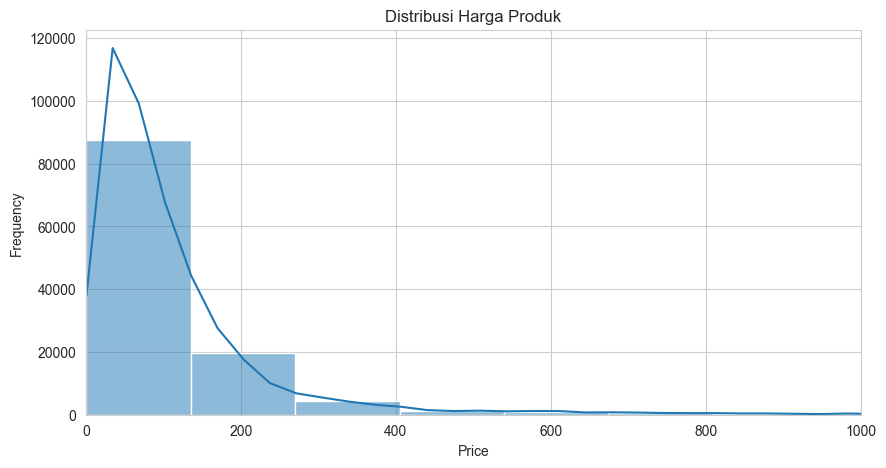

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\3427506510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=merged_df['payment_type'], order=merged_df['payment_type'].value_counts().index, palette='viridis')


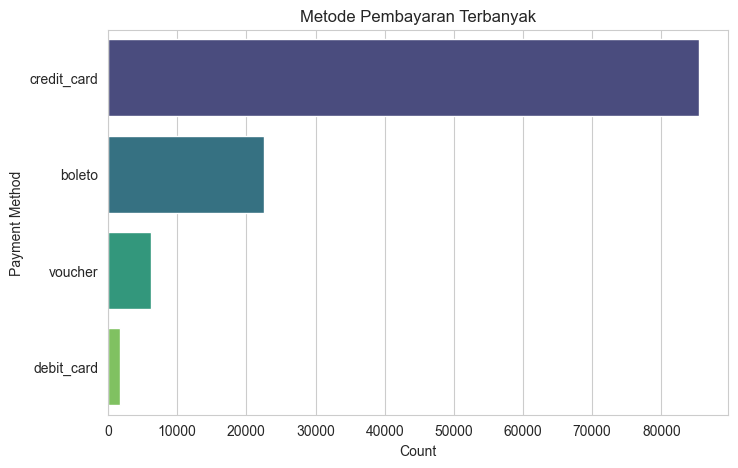

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\3427506510.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_df['review_score'], palette='coolwarm')


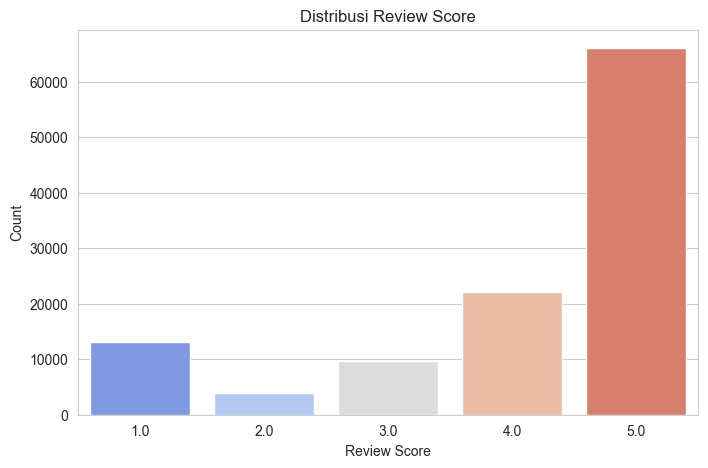

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\3427506510.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='coolwarm')


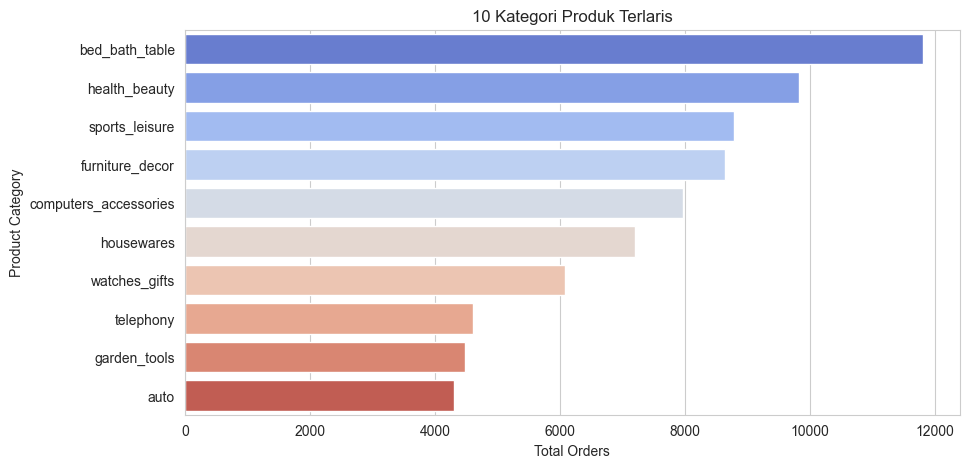

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\3427506510.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sellers.index, x=top_sellers.values, palette='magma')


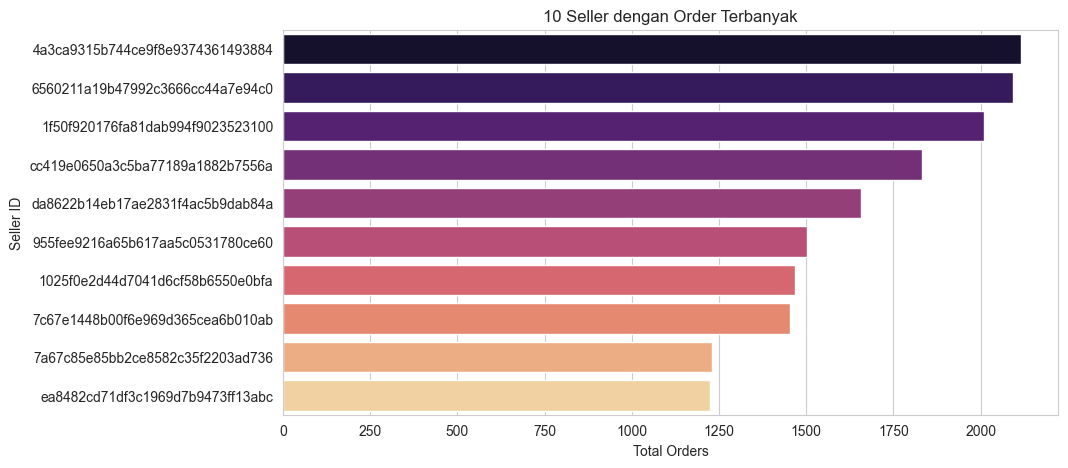

C:\Users\Charles\AppData\Local\Temp\ipykernel_14136\3427506510.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sellers_by_rating.index, x=top_sellers_by_rating.values, palette="viridis")


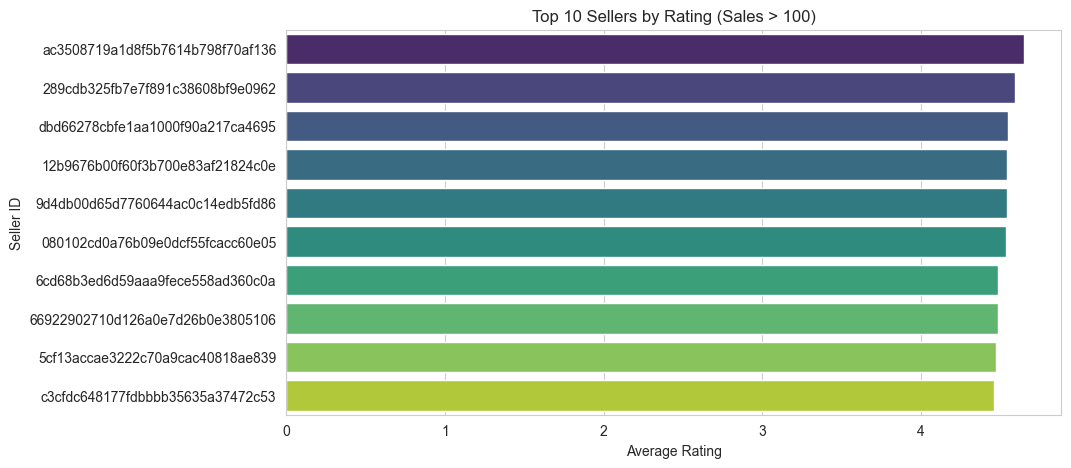

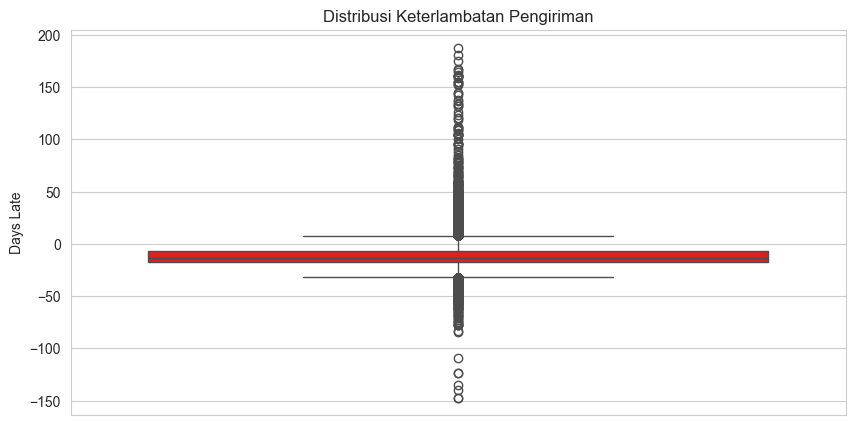

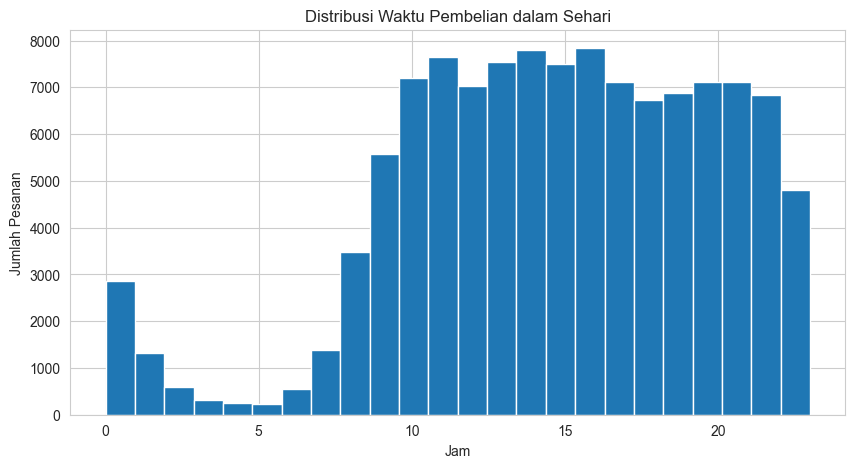

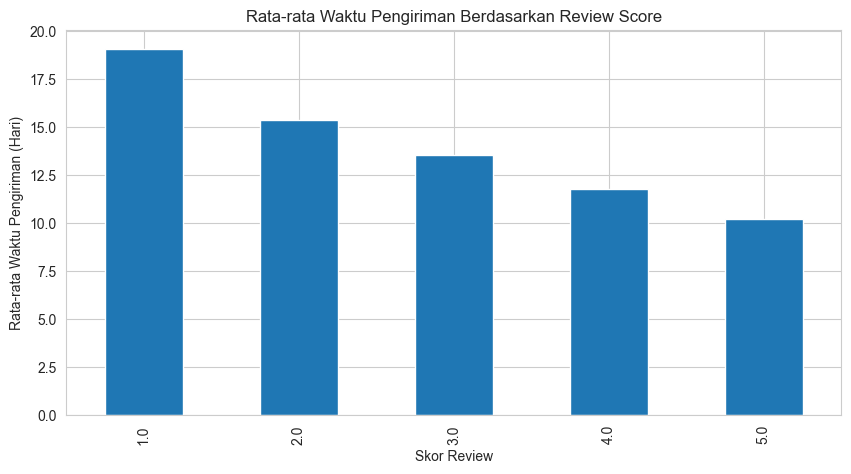

In [54]:
sns.set_style("whitegrid")

# 1. Distribusi Harga Produk
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['price'], bins=50, kde=True)
plt.xlim(0, 1000)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribusi Harga Produk")
plt.show()

# 2. Metode Pembayaran Terbanyak
plt.figure(figsize=(8, 5))
sns.countplot(y=merged_df['payment_type'], order=merged_df['payment_type'].value_counts().index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.title("Metode Pembayaran Terbanyak")
plt.show()

# 3. Distribusi Review Score
plt.figure(figsize=(8, 5))
sns.countplot(x=merged_df['review_score'], palette='coolwarm')
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribusi Review Score")
plt.show()

# 4. Kategori Produk Terlaris
plt.figure(figsize=(10, 5))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='coolwarm')
plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.title("10 Kategori Produk Terlaris")
plt.show()

# 5. Performa Seller (Jumlah Order per Seller)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_sellers.index, x=top_sellers.values, palette='magma')
plt.xlabel("Total Orders")
plt.ylabel("Seller ID")
plt.title("10 Seller dengan Order Terbanyak")
plt.show()

# 6. Performa Seller (Rating Seller)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_sellers_by_rating.index, x=top_sellers_by_rating.values, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Seller ID")
plt.title("Top 10 Sellers by Rating (Sales > 100)")
plt.show()

# 7. Rata-rata Keterlambatan Pengiriman
plt.figure(figsize=(10, 5))
sns.boxplot(y=merged_df['delivery_delay'], color='red')
plt.ylabel("Days Late")
plt.title("Distribusi Keterlambatan Pengiriman")
plt.show()

# 8. Distribusi Waktu Pembelian dalam Sehari
merged_df['hour_timestamp'].hist(bins=24, figsize=(10,5))
plt.title("Distribusi Waktu Pembelian dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Pesanan")
plt.show()

# 9. Rata-rata Waktu Pengiriman Berdasarkan Review Score
merged_df.groupby("review_score")["delivery_time"].mean().plot(kind="bar", figsize=(10,5))
plt.title("Rata-rata Waktu Pengiriman Berdasarkan Review Score")
plt.xlabel("Skor Review")
plt.ylabel("Rata-rata Waktu Pengiriman (Hari)")
plt.show()


### Pertanyaan 1:

  Bagaimana segmentasi pelanggan berdasarkan jumlah dan frekuensi pembelian?

In [55]:
current_date = merged_df['order_purchase_timestamp'].max()
rfm = merged_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days, 
    'customer_id': 'count', 
    'payment_value': 'sum' 
}).rename(columns={'order_purchase_timestamp': 'Recency', 'customer_id': 'Frequency', 'payment_value': 'Monetary'})


In [56]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [57]:
rfm.to_csv("./data/rfm.csv", index=True)
print("Data RFM berhasil disimpan")
rfm

Data RFM berhasil disimpan


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,3,213
000161a058600d5901f007fab4c27140,409,1,67.41,1,1,2,112
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,4,114
0002414f95344307404f0ace7a26f1d5,378,1,179.35,2,1,4,214
000379cdec625522490c315e70c7a9fb,149,1,107.01,4,1,3,413
...,...,...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.91,4,5,3,453
fffecc9f79fd8c764f843e9951b11341,152,3,81.36,4,5,2,452
fffeda5b6d849fbd39689bb92087f431,99,1,63.13,4,5,2,452


Langkah-langkah:
1. Menentukan Tanggal Acuan
2. Mengelompokkan Data Berdasarkan customer_id dan Menghitung RFM
3. Memberikan Skor untuk Setiap Komponen RFM
    - Recency Score (R_Score): Dibagi menjadi 5 kategori (1-5) menggunakan quantile-based discretization (qcut).
        - Nilai 5 berarti pelanggan baru-baru ini bertransaksi.
        - Nilai 1 berarti pelanggan sudah lama tidak bertransaksi.
    - Frequency Score (F_Score): Dibagi menjadi 5 kategori.
        - Nilai 5 berarti pelanggan melakukan pembelian sangat sering.
        - Nilai 1 berarti pelanggan jarang membeli.
    - Monetary Score (M_Score): Dibagi menjadi 5 kategori.
        - Nilai 5 berarti pelanggan menghabiskan banyak uang.
        - Nilai 1 berarti pelanggan hanya mengeluarkan sedikit uang.
4. Menggabungkan Skor RFM 
    - Dimana dari sini bisa kita kelompokan dan pilih startegi terbaik untuk setiap penggolongan customer

#### Interpretasi dan Segmentasi

![Customer Segmentation](Segmentasi.png)

### Pertanyaan 2:

Produk atau kategori apa yang paling sering dibeli oleh pelanggan tertentu?

Jika dilihat dari grafis di atas maka:

- Kategori Terpopuler: Bed, Bath, & Table
- Health & Beauty di Posisi Kedua
- Sports & Leisure di Posisi Ketiga
- Furniture & Decor Tetap Populer
- Aksesori Komputer Menunjukkan Potensi
- Kategori Lainnya

Ini merupakan urutan untuk kategori terpopuler hingga yang tidak

### Pertanyaan 3:

Siapa penjual dengan performa terbaik berdasarkan jumlah pesanan dan rating pelanggan?

- Seller dengan ID 4a3ca9315b744ce9f8e9374361493884 memiliki jumlah pesanan tertinggi, mendekati 2.200 order
- Seller dengan ID ac3508719a1d8f5b7614b798f70af136 memiliki jumlah rating terbesar dengan rating sebesar 4.650485

### Pertanyaan 4:

Apakah ada hubungan antara waktu pengiriman dan kepuasan pelanggan (berdasarkan rating)?

- Terdapat hubungan antara waktu pengiriman dan kepuasan pelanggan dimana waktu pengiriman yang lebih lama, sebagian besar pelanggan akan memberikan rating yang kecil. Sedangkan waktu pengiriman yang lebih cepat, sebagian besar pelanggan akan memberikan rating yang lebih besar 

**Insight:**
1. Mayoritas produk memiliki harga yang rendah dimana puncak distribusi menunjukkan bahwa sebagian besar produk dijual dengan harga di bawah 200.

2. Sebagian besar review memiliki skor 5, menunjukkan bahwa pelanggan umumnya puas dengan produk atau layanan yang mereka terima.

3. Kartu kredit (credit_card) adalah metode pembayaran yang paling sering digunakan, jauh lebih tinggi dibanding metode lainnya. Jika kartu kredit adalah metode dominan, platform e-commerce bisa bekerja sama dengan bank untuk menawarkan promo cicilan, cashback, atau diskon khusus.

4. Fokuskan diskon dan promo bundling untuk kategori dengan demand tinggi seperti bed_bath_table, health_beauty, dan sports_leisure.

5. Seller dengan ID 4a3ca9315b744ce9f8e9374361493884 memiliki jumlah pesanan tertinggi, mendekati 2.200 order. Dimana bisa diberikan bonus agar lebih semangat untuk melakukan jual beli.

6. Terdapat banyak outlier di kedua sisi, terutama di area positif (keterlambatan ekstrem) yang mencapai lebih dari 150 hari keterlambatan. Beberapa outlier juga berada di sisi negatif, yang mungkin menunjukkan data anomali seperti estimasi pengiriman yang lebih lama dari realisasi. Dimana harus diperbaiki dari segi pengiriman untuk tidak telat dan perbaikan terhadap rumus estimasi sehingga realisasi bisa pas dengan estimasi.

7. Pembelian mulai meningkat signifikan sejak pukul 08:00 dan mencapai puncak antara jam 10:00 hingga 20:00. Aktivitas mulai menurun setelah pukul 22:00 hingga akhir hari. Jika ingin meningkatkan penjualan, sebaiknya fokus pada jam puncak (10:00 - 20:00) atau memanfaatkan promo midnight (00:00).

8. Pelanggan yang memberikan skor review rendah (1 atau 2) mengalami waktu pengiriman lebih lama (sekitar 15-19 hari). Pelanggan yang memberikan skor review tinggi (4 atau 5) memiliki waktu pengiriman lebih cepat (sekitar 10 hari atau kurang). Artinya lama pengiriman akan memengaruhi skor review yang diberikan oleh pelanggan.